In [17]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [2]:
import os
import glob
import sys
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/tropics.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    pass

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/grid_attributes.pkl instead of computing


In [8]:
temp = gr.get_var_id_ds("T2mm")
prec = gr.get_var_id_ds("Prec")
prec.wet_Prec.mean()

<xarray.DataArray 'wet_Prec' ()>
array(0.08744744)

In [9]:
jd = joint_distrib.JointDistribution(gr, nd=5, var_id_1 = "mean_Prec", var_id_2 = "max_Prec", overwrite =True, storm_tracking=True, regionalize=False)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Loading storms...
loading storms from pkl
Time elapsed for loading storms: 30.47 seconds
Time elapsed for propagating all labels: 5.97 seconds


## Mean vs local_Prec

In [6]:
jd_mean_max = joint_distrib.JointDistribution(gr, nd=5, var_id_1 = "mean_Prec", var_id_2 = "max_Prec", overwrite =True, storm_tracking=True, regionalize=False)
jd_mean_heavy = joint_distrib.JointDistribution(gr, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "heavy_Prec", overwrite = True, storm_tracking = True)
jd_mean_supra = joint_distrib.JointDistribution(gr, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "supra_Prec", overwrite = True, storm_tracking = True)
jd_mean_ultra = joint_distrib.JointDistribution(gr, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "convective_Prec", overwrite = True, storm_tracking = True)
jds = [jd_mean_max, jd_mean_heavy, jd_mean_supra, jd_mean_ultra]

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Loading storms...
loading storms from pkl
Time elapsed for loading storms: 30.92 seconds
Time elapsed for propagating all labels: 6.03 seconds
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Loading storms...
loading storms from pkl


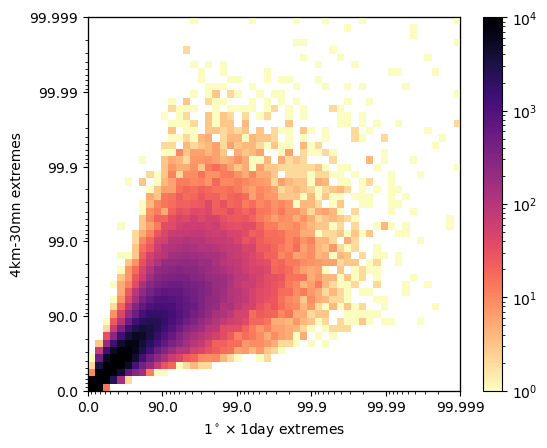

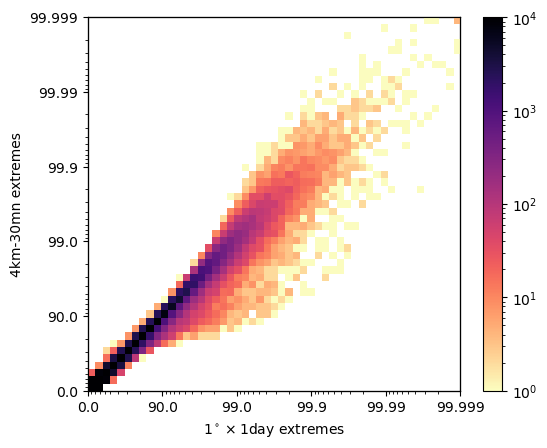

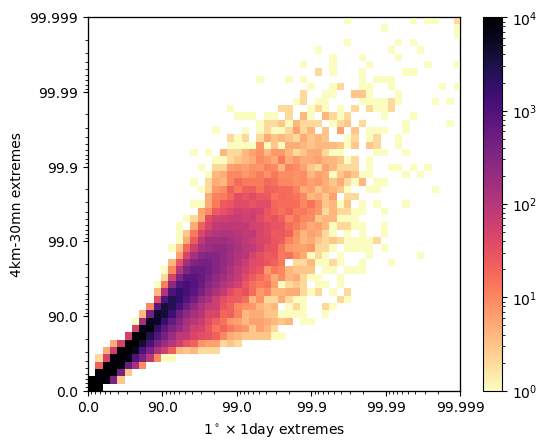

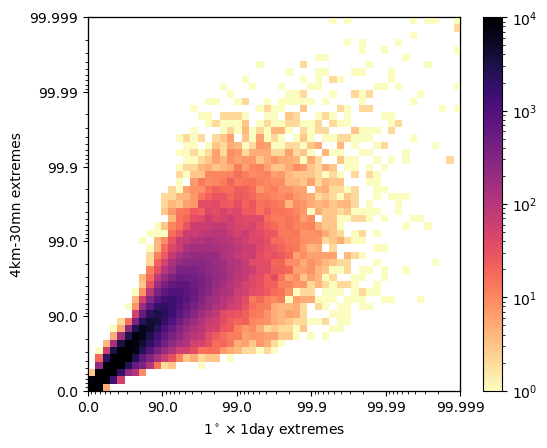

In [ ]:
%matplotlib inline 
for jd in jds: 
    countbin = jd.count_mcs_in_jdist()
    jd.plot_data(jd.bincount, scale = 'log', cmap=plt.cm.magma_r, vbds = (1, 1e4))

# T2mm

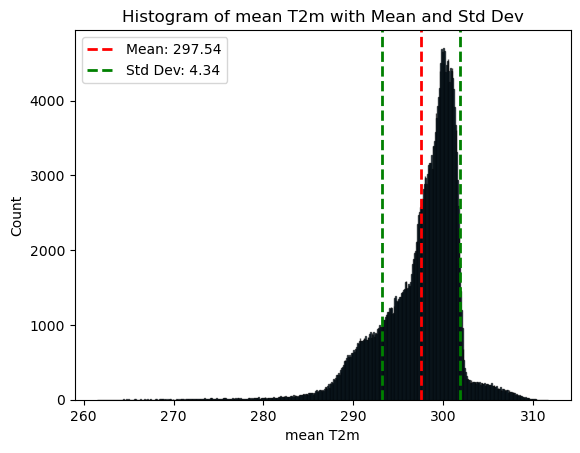

In [ ]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

X = temp.mean_T2mm.values.ravel()   
X_mean = np.mean(X)
X_std = np.std(X)

# Create histogram with manually adjusted bins
bins = int(np.sqrt(len(X)))

plt.hist(X, bins=bins, edgecolor='black', alpha=0.7)

# Add mean and standard deviation to the plot
plt.axvline(X_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {X_mean:.2f}')
plt.axvline(X_mean + X_std, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {X_std:.2f}')
plt.axvline(X_mean - X_std, color='green', linestyle='dashed', linewidth=2)

# Add labels and title
plt.xlabel('mean T2m')
plt.ylabel('Count')
plt.title('Histogram of mean T2m with Mean and Std Dev')

# Show legend
plt.legend()

# Display the plot
plt.show()

# no day offset

In [ ]:
jd =jd_mean_max

spatial_where_inf_300 = list(np.where(temp.mean_T2mm < 300))
spatial_where_300_301 = list(np.where((temp.mean_T2mm >= 300) & (temp.mean_T2mm < 301)))
spatial_where_301_302 = list(np.where((temp.mean_T2mm >= 301) & (temp.mean_T2mm < 302)))
spatial_where_sup_302 = list(np.where(temp.mean_T2mm >= 302))

days_offset = len(prec.days) - len(temp.days) #add n to this value and get rid off last n_days to compare temp lagged

spatial_where_inf_300[2] = spatial_where_inf_300[2]+days_offset
spatial_where_300_301[2] = spatial_where_300_301[2]+days_offset
spatial_where_301_302[2] = spatial_where_301_302[2]+days_offset
spatial_where_sup_302[2] = spatial_where_sup_302[2]+days_offset

mean_prec_t2m_inf_300 = prec.mean_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
mean_prec_t2m_300_301 = prec.mean_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
mean_prec_t2m_301_302 = prec.mean_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
mean_prec_t2m_sup_302 = prec.mean_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

max_prec_t2m_inf_300 = prec.max_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
max_prec_t2m_300_301 = prec.max_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
max_prec_t2m_301_302 = prec.max_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
max_prec_t2m_sup_302 = prec.max_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

bincount_t2m_inf_300, _ , _ = np.histogram2d(x = mean_prec_t2m_inf_300, y = max_prec_t2m_inf_300, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_300_301, _ , _ = np.histogram2d(x = mean_prec_t2m_300_301, y = max_prec_t2m_300_301, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_301_302, _ , _ = np.histogram2d(x = mean_prec_t2m_301_302, y = max_prec_t2m_301_302, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_sup_302, _ , _ = np.histogram2d(x = mean_prec_t2m_sup_302, y = max_prec_t2m_sup_302, bins =(jd.bins1, jd.bins2), density=False)

/scratchx/mcarenso/ipykernel_1069376/2507491561.py:8: RuntimeWarning: invalid value encountered in divide
  jd_mean_max.plot_data(bincount/jd_mean_max.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)


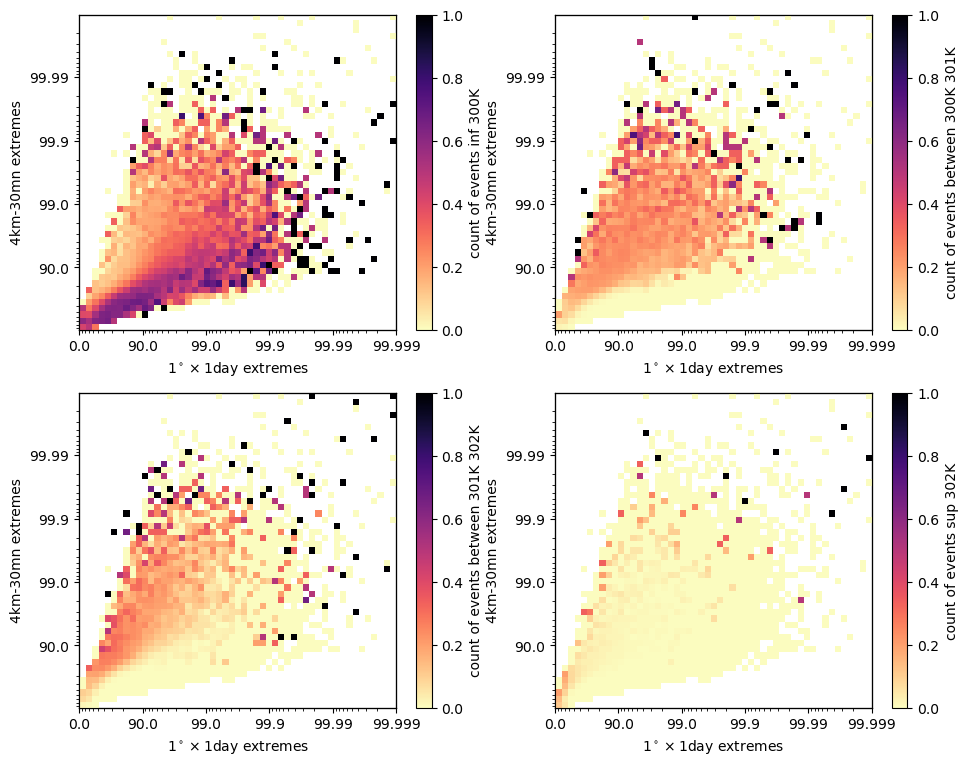

In [ ]:
fig,axs =plt.subplots(nrows=2, ncols=2, figsize =(11.25, 9))


bincounts = [bincount_t2m_inf_300, bincount_t2m_300_301, bincount_t2m_301_302, bincount_t2m_sup_302]
labels = ["inf 300K", "between 300K 301K", "between 301K 302K", "sup 302K"]

for bincount, ax, label in zip(bincounts, axs.flatten(), labels):
    jd_mean_max.plot_data(bincount/jd_mean_max.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)

<AxesSubplot:xlabel='1$^\\circ\\times 1$day extremes', ylabel='4km-30mn extremes'>

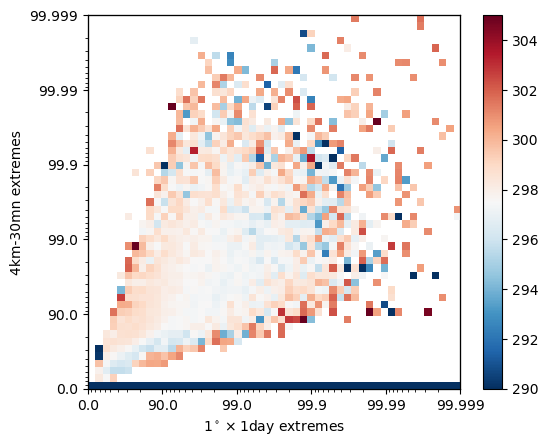

In [ ]:
temp_2m= gr.get_var_id_ds("T2mm").sortby('days')
mean_temp_2m = temp_2m.mean_T2mm.values.flatten()
to_fill = len(jd.sample1) - len(mean_temp_2m)
mean_temp_2m_processed = np.pad(mean_temp_2m, (to_fill, 0), mode = 'constant', constant_values=np.nan)
mean_temp_2m_on_density = jd.compute_conditional_data_over_density(jd.sample1, jd.sample2, mean_temp_2m_processed) 
jd.plot_data(mean_temp_2m_on_density, vbds = (290, 305))

# QV*

In [ ]:
qv_sat_2d = gr.get_var_id_ds("QV_sat_2d").sortby('days')
mean_qv_sat = qv_sat_2d.mean_QV_sat_2d.values.flatten()
to_fill = len(jd.sample1) - len(mean_qv_sat)
mean_qv_sat_processed = np.pad(mean_qv_sat, (to_fill, 0), mode = 'constant', constant_values=np.nan)

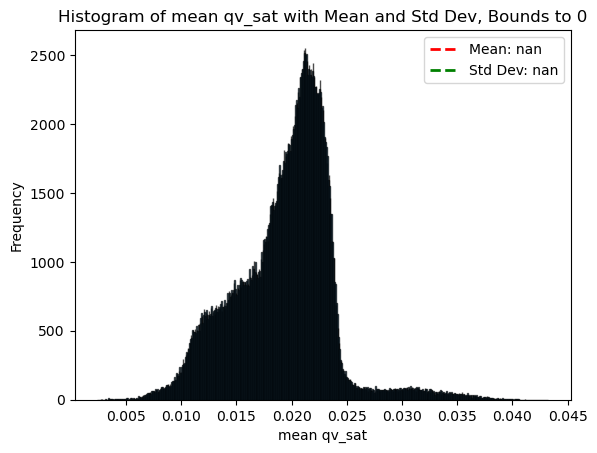

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = mean_qv_sat_processed 
X_mean = np.mean(X)
X_std = np.std(X)

# Create histogram with manually adjusted bins
bins = int(np.sqrt(len(X)))

plt.hist(X, bins=bins, edgecolor='black', alpha=0.7)

# Add mean and standard deviation to the plot
plt.axvline(X_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {X_mean:.2f}')
plt.axvline(X_mean + X_std, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {X_std:.2f}')
plt.axvline(X_mean - X_std, color='green', linestyle='dashed', linewidth=2)

# Add labels and title
plt.xlabel('mean qv_sat')
plt.ylabel('Frequency')
plt.title('Histogram of mean qv_sat with Mean and Std Dev, Bounds to 0')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
mean_qv_sat = 100*qv_sat_2d.mean_QV_sat_2d # décigramme par kilogramme psk pourquoi pas

/scratchx/mcarenso/ipykernel_1069376/3807210881.py:37: RuntimeWarning: invalid value encountered in divide
  jd.plot_data(bincount/jd.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)


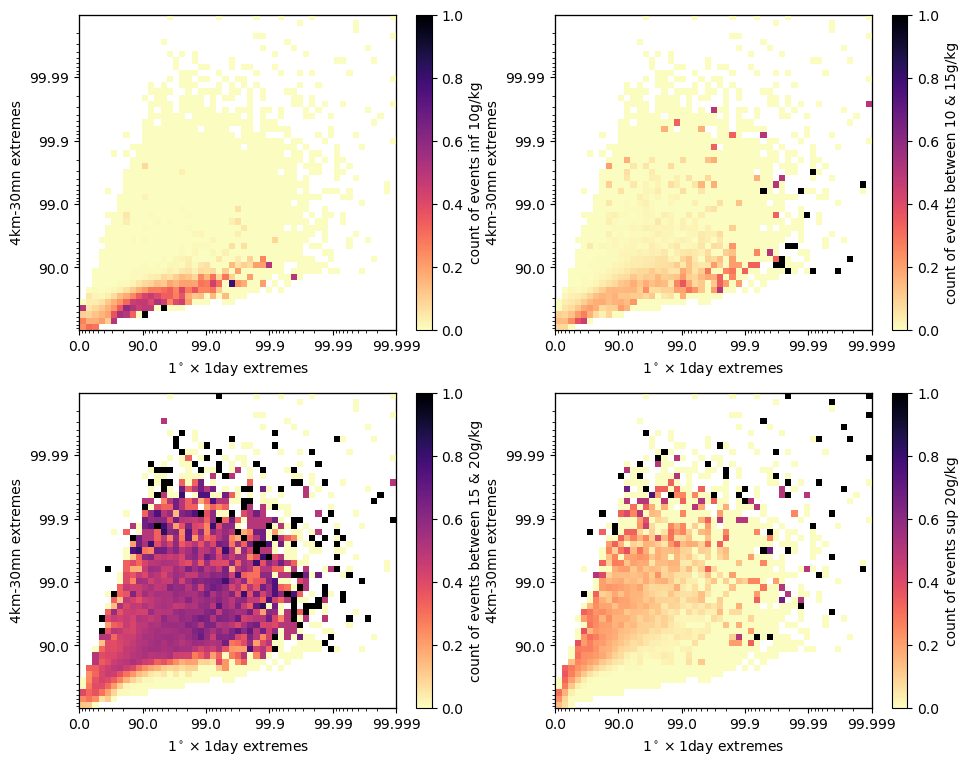

In [ ]:
jd =jd_mean_max

spatial_where_inf_300 = list(np.where(mean_qv_sat < 1.5))
spatial_where_300_301 = list(np.where((mean_qv_sat >= 1.5) & (mean_qv_sat < 1.8)))
spatial_where_301_302 = list(np.where((mean_qv_sat >= 1.8) & (mean_qv_sat < 2.3)))
spatial_where_sup_302 = list(np.where(mean_qv_sat >= 2.3))

days_offset = len(prec.days) - len(temp.days) #add n to this value and get rid off last n_days to compare temp lagged

spatial_where_inf_300[2] = spatial_where_inf_300[2]+days_offset
spatial_where_300_301[2] = spatial_where_300_301[2]+days_offset
spatial_where_301_302[2] = spatial_where_301_302[2]+days_offset
spatial_where_sup_302[2] = spatial_where_sup_302[2]+days_offset

mean_prec_t2m_inf_300 = prec.mean_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
mean_prec_t2m_300_301 = prec.mean_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
mean_prec_t2m_301_302 = prec.mean_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
mean_prec_t2m_sup_302 = prec.mean_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

max_prec_t2m_inf_300 = prec.max_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
max_prec_t2m_300_301 = prec.max_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
max_prec_t2m_301_302 = prec.max_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
max_prec_t2m_sup_302 = prec.max_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

bincount_t2m_inf_300, _ , _ = np.histogram2d(x = mean_prec_t2m_inf_300, y = max_prec_t2m_inf_300, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_300_301, _ , _ = np.histogram2d(x = mean_prec_t2m_300_301, y = max_prec_t2m_300_301, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_301_302, _ , _ = np.histogram2d(x = mean_prec_t2m_301_302, y = max_prec_t2m_301_302, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_sup_302, _ , _ = np.histogram2d(x = mean_prec_t2m_sup_302, y = max_prec_t2m_sup_302, bins =(jd.bins1, jd.bins2), density=False)

fig,axs =plt.subplots(nrows=2, ncols=2, figsize =(11.25, 9))


bincounts = [bincount_t2m_inf_300, bincount_t2m_300_301, bincount_t2m_301_302, bincount_t2m_sup_302]
labels = ["inf 10g/kg", "between 10 & 15g/kg", "between 15 & 20g/kg", "sup 20g/kg"]

for bincount, ax, label in zip(bincounts, axs.flatten(), labels):
    jd.plot_data(bincount/jd.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)

Text(0.5, 1.0, 'Mean QV_sat')

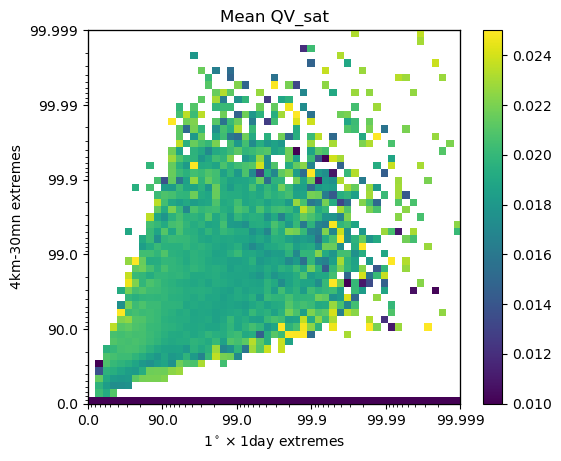

In [ ]:
mean_qv_sat_on_density = jd.compute_conditional_data_over_density(jd.sample1, jd.sample2, mean_qv_sat_processed) 
jd.plot_data(mean_qv_sat_on_density, cmap = plt.cm.viridis, branch=False, vbds=(0.01, 0.025))
plt.title("Mean QV_sat")

In [ ]:
mean_qv_sat_on_density.T[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 2 days offset - remove 2 days or index mismatch

In [ ]:
spatial_where_inf_300 = list(np.where(temp.mean_T2mm < 300))
spatial_where_300_301 = list(np.where((temp.mean_T2mm >= 300) & (temp.mean_T2mm < 301)))
spatial_where_301_302 = list(np.where((temp.mean_T2mm >= 301) & (temp.mean_T2mm < 302)))
spatial_where_sup_302 = list(np.where(temp.mean_T2mm >= 302))

days_offset = len(prec.days) - len(temp.days) + 2 

spatial_where_inf_300[2] = spatial_where_inf_300[2]+days_offset
spatial_where_300_301[2] = spatial_where_300_301[2]+days_offset
spatial_where_301_302[2] = spatial_where_301_302[2]+days_offset
spatial_where_sup_302[2] = spatial_where_sup_302[2]+days_offset

# mean_prec_t2m_inf_300 = prec.mean_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
# mean_prec_t2m_300_301 = prec.mean_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
# mean_prec_t2m_301_302 = prec.mean_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
# mean_prec_t2m_sup_302 = prec.mean_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

# max_prec_t2m_inf_300 = prec.max_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
# max_prec_t2m_300_301 = prec.max_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
# max_prec_t2m_301_302 = prec.max_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
# max_prec_t2m_sup_302 = prec.max_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

# bincount_t2m_inf_300, _ , _ = np.histogram2d(x = mean_prec_t2m_inf_300, y = max_prec_t2m_inf_300, bins =(jd.bins1, jd.bins2), density=False)
# bincount_t2m_300_301, _ , _ = np.histogram2d(x = mean_prec_t2m_300_301, y = max_prec_t2m_300_301, bins =(jd.bins1, jd.bins2), density=False)
# bincount_t2m_301_302, _ , _ = np.histogram2d(x = mean_prec_t2m_301_302, y = max_prec_t2m_301_302, bins =(jd.bins1, jd.bins2), density=False)
# bincount_t2m_sup_302, _ , _ = np.histogram2d(x = mean_prec_t2m_sup_302, y = max_prec_t2m_sup_302, bins =(jd.bins1, jd.bins2), density=False)